## Simulating a Poisson distribution (starting with a uniform RV)

This is a simple example of simulating a Poisson distribution.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Recall that a Poisson distribution is defined as having exponential interarrival times. This is useful in simulating a Poisson distribution, as we can easily get an exponential RV from uniforms with inversion.

In [2]:
def gen_exp(size=1):
    uniforms = np.random.uniform(0,1,size=size)
    return -np.log(uniforms)

(array([195., 146., 130., 109.,  74.,  71.,  51.,  47.,  28.,  28.,  24.,
         19.,  10.,  18.,   9.,   6.,   4.,   4.,   4.,   8.,   3.,   3.,
          3.,   0.,   2.,   2.,   0.,   0.,   1.,   1.]),
 array([7.10070116e-04, 2.16151313e-01, 4.31592556e-01, 6.47033799e-01,
        8.62475042e-01, 1.07791628e+00, 1.29335753e+00, 1.50879877e+00,
        1.72424001e+00, 1.93968126e+00, 2.15512250e+00, 2.37056374e+00,
        2.58600498e+00, 2.80144623e+00, 3.01688747e+00, 3.23232871e+00,
        3.44776996e+00, 3.66321120e+00, 3.87865244e+00, 4.09409368e+00,
        4.30953493e+00, 4.52497617e+00, 4.74041741e+00, 4.95585866e+00,
        5.17129990e+00, 5.38674114e+00, 5.60218238e+00, 5.81762363e+00,
        6.03306487e+00, 6.24850611e+00, 6.46394736e+00]),
 <BarContainer object of 30 artists>)

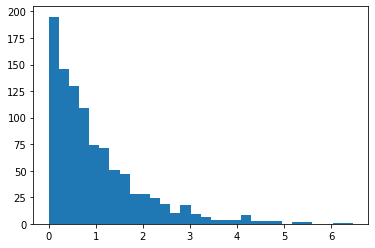

In [6]:
plt.hist(gen_exp(1000), bins=30)

Now that we have our exponential RV we can use it to generate interarrival times for our Poisson RV.

In [29]:
def poisson(time):
    arrivals = 0
    total = 0
    while total < time:
        total += gen_exp()
        arrivals += 1
    return arrivals - 1

The below histograms illustrate that our Poisson RV does indeed behave as expected, given various expected numbers of arrivals $\lambda$.

In [69]:
# expected Poisson values, for use with overlaying onto histograms
def pmf(lam, k):
    return (lam**k * np.exp(-lam))/np.math.factorial(k)

(array([5.08474576e-05, 5.08474576e-05, 5.08474576e-05, 1.52542373e-04,
        8.13559322e-04, 1.98305085e-03, 3.20338983e-03, 6.76271186e-03,
        1.15932203e-02, 1.87118644e-02, 2.64915254e-02, 3.76779661e-02,
        4.91694915e-02, 5.56271186e-02, 5.68474576e-02, 5.64406780e-02,
        5.05932203e-02, 3.97118644e-02, 3.22372881e-02, 2.42033898e-02,
        1.55593220e-02, 7.83050847e-03, 6.10169492e-03, 3.20338983e-03,
        1.72881356e-03, 9.66101695e-04, 4.57627119e-04, 5.08474576e-05,
        1.01694915e-04, 1.01694915e-04]),
 array([21.        , 22.96666667, 24.93333333, 26.9       , 28.86666667,
        30.83333333, 32.8       , 34.76666667, 36.73333333, 38.7       ,
        40.66666667, 42.63333333, 44.6       , 46.56666667, 48.53333333,
        50.5       , 52.46666667, 54.43333333, 56.4       , 58.36666667,
        60.33333333, 62.3       , 64.26666667, 66.23333333, 68.2       ,
        70.16666667, 72.13333333, 74.1       , 76.06666667, 78.03333333,
        80.     

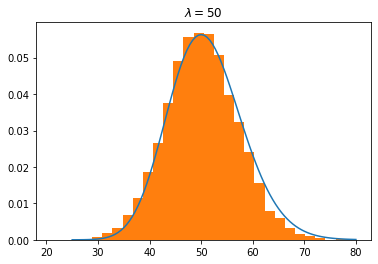

In [59]:
sample = [poisson(50) for _ in range(10_000)]

exp_space = np.linspace(25, 80, 100)
expected = pmf(exp_space, 50)
plt.plot(exp_space, expected)
plt.title(r'$\lambda = {}$'.format(50))
plt.hist(sample, density=True, bins=30)

(array([0.00290909, 0.00690909, 0.01745455, 0.03427273, 0.05754545,
        0.082     , 0.10063636, 0.11936364, 0.11381818, 0.09881818,
        0.15027273, 0.04627273, 0.03227273, 0.01963636, 0.01345455,
        0.00718182, 0.00381818, 0.00127273, 0.00063636, 0.00054545]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ,
        13.1, 14.2, 15.3, 16.4, 17.5, 18.6, 19.7, 20.8, 21.9, 23. ]),
 <BarContainer object of 20 artists>)

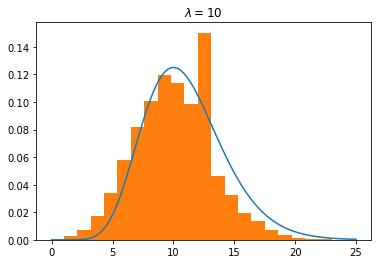

In [68]:
sample = [poisson(10) for _ in range(10_000)]

exp_space = np.linspace(0, 25, 100)
expected = pmf(exp_space, 10)
plt.plot(exp_space, expected)
plt.title(r'$\lambda = {}$'.format(10))
plt.hist(sample, density=True, bins=20)

(array([0.0081, 0.0376, 0.081 , 0.1486, 0.1718, 0.1716, 0.1435, 0.1025,
        0.0631, 0.037 , 0.0205, 0.008 , 0.004 , 0.0019, 0.0008]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15.]),
 <BarContainer object of 15 artists>)

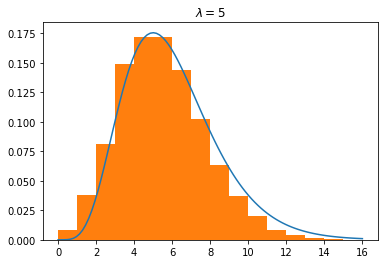

In [49]:
sample = [poisson(5) for _ in range(10_000)]

exp_space = np.linspace(0, 16, 100)
expected = pmf(exp_space, 5)
plt.plot(exp_space, expected)
plt.title(r'$\lambda = {}$'.format(5))
plt.hist(sample, density=True, bins=15)

(array([4.19085714e-01, 4.26857143e-01, 2.04800000e-01, 7.06285714e-02,
        1.76000000e-02, 2.97142857e-03, 8.00000000e-04, 1.14285714e-04]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <BarContainer object of 8 artists>)

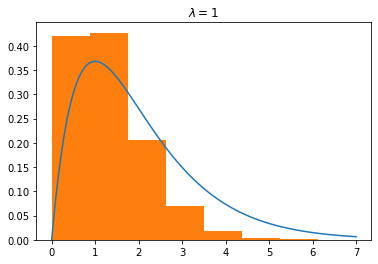

In [55]:
sample = [poisson(1) for _ in range(10_000)]

exp_space = np.linspace(0, 7, 100)
expected = pmf(exp_space, 1)
plt.plot(exp_space, expected)
plt.title(r'$\lambda = {}$'.format(1))
plt.hist(sample, density=True, bins=8)